In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import xlrd
df = pd.read_excel('data1.xlsx')

In [3]:
df

,Yearly Amount Spent,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,587.951054,34.497268,12.655651,39.577668,4.082621
1,392.204933,31.926272,11.109461,37.268959,2.664034
2,487.547505,33.000915,11.330278,37.110597,4.104543
3,581.852344,34.305557,13.717514,36.721283,3.120179
4,599.406092,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,573.847438,33.237660,13.566160,36.417985,3.746573
496,529.049004,34.702529,11.695736,37.190268,3.576526
497,551.620145,32.646777,11.499409,38.332576,4.958264
498,456.469510,33.322501,12.391423,36.840086,2.336485


In [4]:
df.describe()

,Yearly Amount Spent,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,499.314038,33.053194,12.052488,37.060445,3.533462
std,79.314782,0.992563,0.994216,1.010489,0.999278
min,256.670582,29.532429,8.508152,33.913847,0.269901
25%,445.038277,32.341822,11.388153,36.349257,2.930450
50%,498.887875,33.082008,11.983231,37.069367,3.533975
75%,549.313828,33.711985,12.753850,37.716432,4.126502
max,765.518462,36.139662,15.126994,40.005182,6.922689


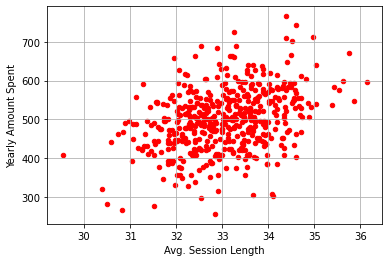

In [5]:
df.plot(x='Avg. Session Length',y='Yearly Amount Spent', kind='scatter', color='red')
plt.grid(True)
plt.show()

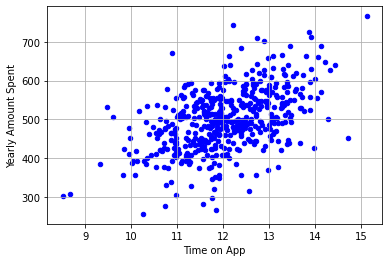

In [6]:
df.plot(x='Time on App',y='Yearly Amount Spent', kind='scatter', color='blue')
plt.grid(True)
plt.show()

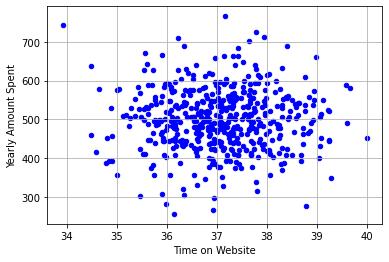

In [7]:
df.plot(x='Time on Website',y='Yearly Amount Spent', kind='scatter', color='blue')
plt.grid(True)
plt.show()

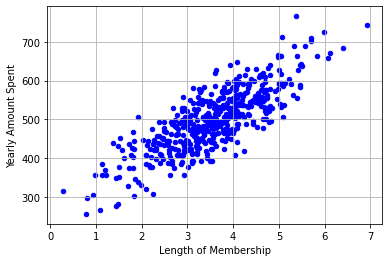

In [8]:
df.plot(x='Length of Membership',y='Yearly Amount Spent', kind='scatter', color='blue')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

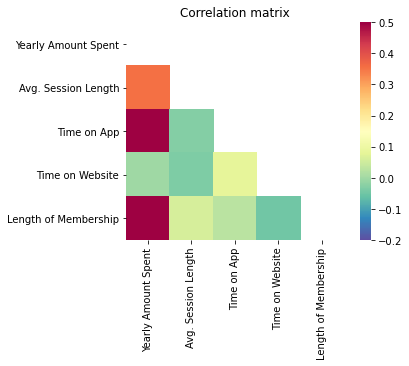

In [9]:
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.2, vmax=.5)
plt.title('Correlation matrix')

In [10]:
corrs

,Yearly Amount Spent,Avg. Session Length,Time on App,Time on Website,Length of Membership
Yearly Amount Spent,1.000000,0.355088,0.499328,-0.002641,0.809084
Avg. Session Length,0.355088,1.000000,-0.027826,-0.034987,0.060247
Time on App,0.499328,-0.027826,1.000000,0.082388,0.029143
Time on Website,-0.002641,-0.034987,0.082388,1.000000,-0.047582
Length of Membership,0.809084,0.060247,0.029143,-0.047582,1.000000


In [11]:
df.columns = ['Yearly Amount Spent','Avg. Session Length','Time on App','Time on Website','Length of Membership']
print(df.describe())

       Yearly Amount Spent  Avg. Session Length  Time on App  Time on Website  \
count           500.000000           500.000000   500.000000       500.000000   
mean            499.314038            33.053194    12.052488        37.060445   
std              79.314782             0.992563     0.994216         1.010489   
min             256.670582            29.532429     8.508152        33.913847   
25%             445.038277            32.341822    11.388153        36.349257   
50%             498.887875            33.082008    11.983231        37.069367   
75%             549.313828            33.711985    12.753850        37.716432   
max             765.518462            36.139662    15.126994        40.005182   

       Length of Membership  
count            500.000000  
mean               3.533462  
std                0.999278  
min                0.269901  
25%                2.930450  
50%                3.533975  
75%                4.126502  
max                6.922689  


In [12]:
X = df.iloc[:,df.columns != 'Yearly Amount Spent']
Y = df.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                      Coefficient
Avg. Session Length     25.888150
Time on App             38.870465
Time on Website          0.470662
Length of Membership    61.783690


In [15]:
coeff_df

,Coefficient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


In [16]:
y_pred = model.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
90,449.070319,438.464881
254,482.602467,489.661845
283,374.269675,370.069542
445,513.153112,513.859056
461,502.771075,495.697999
...,...,...
372,385.152338,383.744509
56,520.898794,524.168192
440,499.140152,500.682688
60,616.851523,606.787827


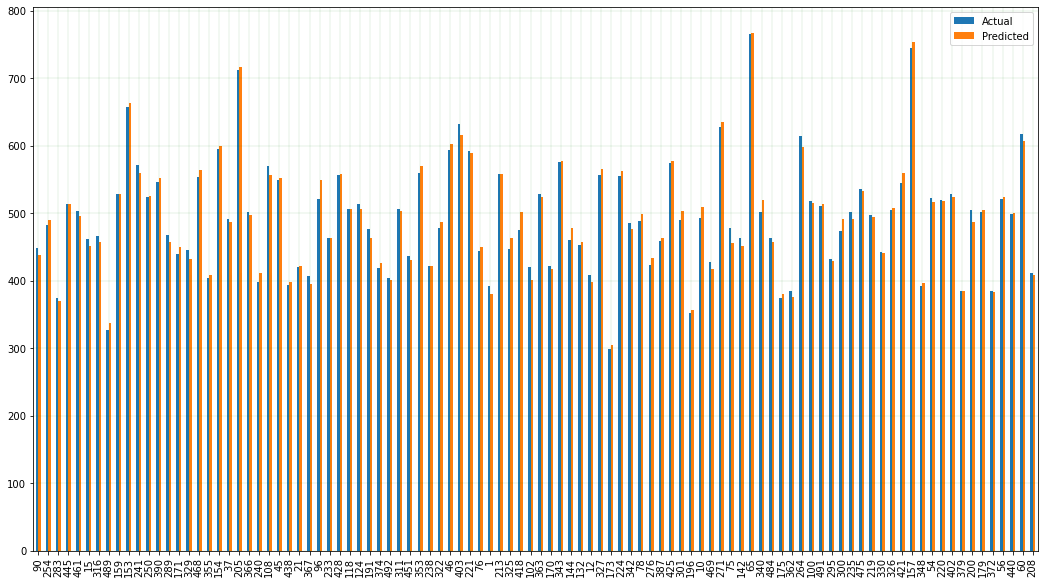

In [18]:
df.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()

In [19]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 -1060.5508096198841
Root Mean Square Error 
 9.637951185028259
R^2 Value: 
 0.9861924261981544


In [20]:
r2_value

0.9861924261981544

In [21]:
rmsd

9.637951185028259

In [22]:
model.intercept_

-1060.5508096198841

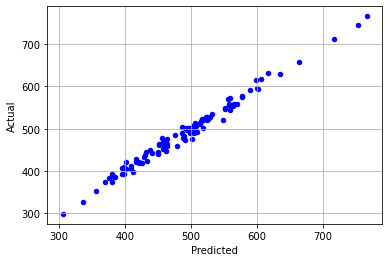

In [23]:
df.plot(x='Predicted',y='Actual', kind='scatter', color='blue')
plt.grid(True)
plt.show()